In [184]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [185]:
pwd

'C:\\Users\\Anjali\\notebooks\\Untitled Folder'

In [186]:
df = pd.read_excel('C:\\Users\\Anjali\\notebooks\\Untitled Folder\\perrinchampagne (1).xlsx')

In [187]:
df.drop(df.index[range(0,11)],axis=0,inplace=True)
df

,Perrin Freres monthly champagne sales millions ’64-’72,Unnamed: 1,Unnamed: 2
11,1964-01-01 00:00:00,2815,NaN
12,1964-02-01 00:00:00,2672,NaN
13,1964-03-01 00:00:00,2755,NaN
14,1964-04-01 00:00:00,2721,NaN
15,1964-05-01 00:00:00,2946,NaN
...,...,...,...
111,1972-05-01 00:00:00,4618,NaN
112,1972-06-01 00:00:00,5312,NaN
113,1972-07-01 00:00:00,4298,NaN
114,1972-08-01 00:00:00,1413,NaN


In [188]:
df.rename(columns={'Unnamed: 1': 'Perrin Freres monthly champagne sales millions ’64-’7'}, inplace=True)
df.rename(columns={'Perrin Freres monthly champagne sales millions ’64-’72': 'Month'}, inplace=True)


In [189]:
df

,Month,Perrin Freres monthly champagne sales millions ’64-’7,Unnamed: 2
11,1964-01-01 00:00:00,2815,NaN
12,1964-02-01 00:00:00,2672,NaN
13,1964-03-01 00:00:00,2755,NaN
14,1964-04-01 00:00:00,2721,NaN
15,1964-05-01 00:00:00,2946,NaN
...,...,...,...
111,1972-05-01 00:00:00,4618,NaN
112,1972-06-01 00:00:00,5312,NaN
113,1972-07-01 00:00:00,4298,NaN
114,1972-08-01 00:00:00,1413,NaN


In [190]:
df.drop(['Unnamed: 2'], axis = 1,inplace=True)
df.head()

,Month,Perrin Freres monthly champagne sales millions ’64-’7
11,1964-01-01 00:00:00,2815
12,1964-02-01 00:00:00,2672
13,1964-03-01 00:00:00,2755
14,1964-04-01 00:00:00,2721
15,1964-05-01 00:00:00,2946


In [191]:
df

,Month,Perrin Freres monthly champagne sales millions ’64-’7
11,1964-01-01 00:00:00,2815
12,1964-02-01 00:00:00,2672
13,1964-03-01 00:00:00,2755
14,1964-04-01 00:00:00,2721
15,1964-05-01 00:00:00,2946
...,...,...
111,1972-05-01 00:00:00,4618
112,1972-06-01 00:00:00,5312
113,1972-07-01 00:00:00,4298
114,1972-08-01 00:00:00,1413


In [192]:
df.dtypes

Month                                                    object
Perrin Freres monthly champagne sales millions ’64-’7    object
dtype: object

In [193]:
df.describe()

,Month,Perrin Freres monthly champagne sales millions ’64-’7
count,105,105
unique,105,103
top,1971-10-01 00:00:00,3986
freq,1,2


In [194]:
df['Month'] = pd.to_datetime(df['Month'])
df

,Month,Perrin Freres monthly champagne sales millions ’64-’7
11,1964-01-01,2815
12,1964-02-01,2672
13,1964-03-01,2755
14,1964-04-01,2721
15,1964-05-01,2946
...,...,...
111,1972-05-01,4618
112,1972-06-01,5312
113,1972-07-01,4298
114,1972-08-01,1413


In [196]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df['Perrin Freres monthly champagne sales millions ’64-’7'])

In [197]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF Test Statistic','p-value','Lags used','Number of Observation used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Data is stationary and Reject Null Hypothesis')
    else:
        print('Data is non stationary and Accept Null Hypothesis')


In [198]:
adfuller_test(df['Perrin Freres monthly champagne sales millions ’64-’7'])

ADF Test Statistic : -1.8335930563276297
p-value : 0.3639157716602417
Lags used : 11
Number of Observation used : 93
Data is non stationary and Accept Null Hypothesis


In [199]:
df['Seasonal Sales Difference'] = df['Perrin Freres monthly champagne sales millions ’64-’7'] - df['Perrin Freres monthly champagne sales millions ’64-’7'].shift(12)

In [200]:
adfuller_test(df['Seasonal Sales Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
Lags used : 0
Number of Observation used : 92
Data is stationary and Reject Null Hypothesis


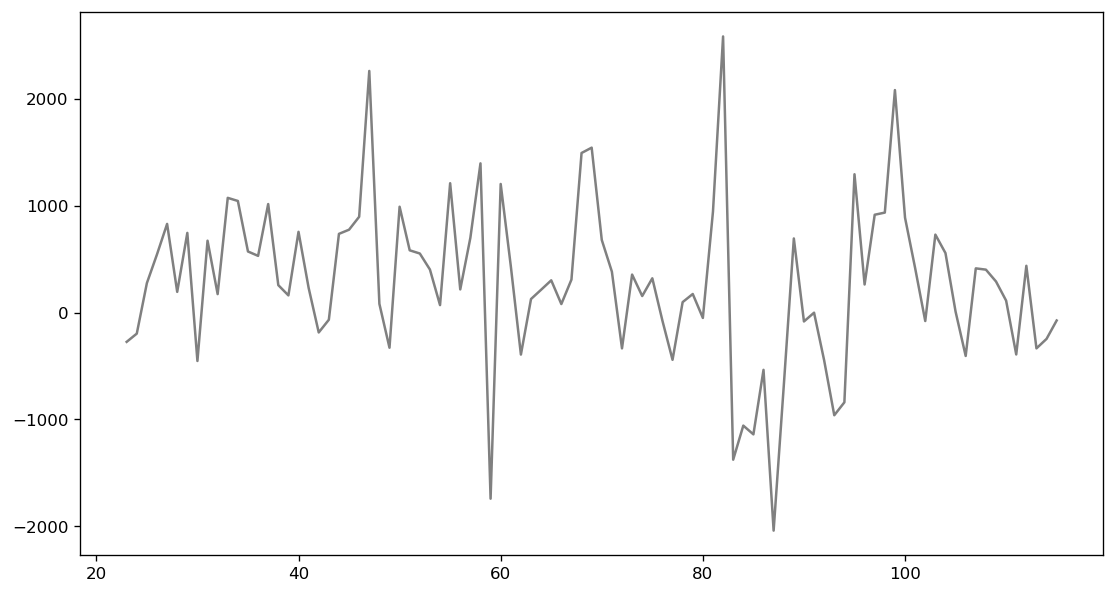

In [201]:
df['Seasonal Sales Difference'].plot(figsize=(11,6),c='grey')

In [202]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

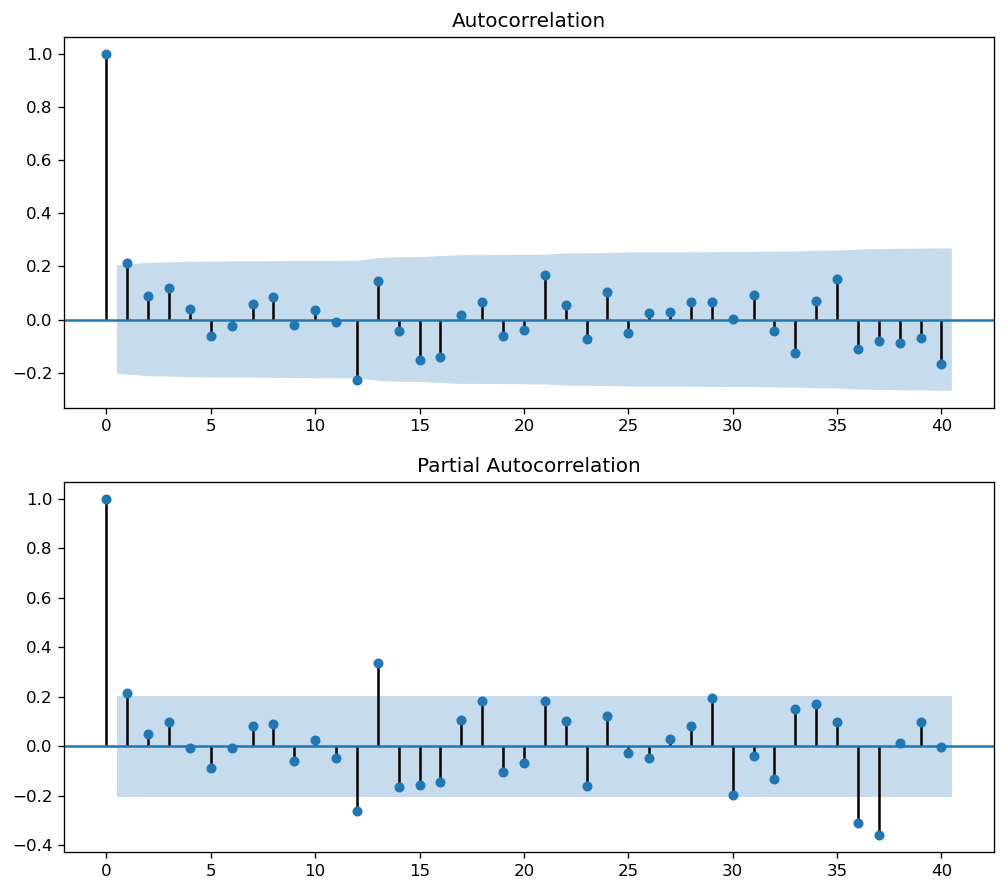

In [203]:
fig =plt.figure(figsize=(10,9))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal Sales Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal Sales Difference'].iloc[13:],lags= 40,ax=ax2)

In [204]:
from pandas.tseries.offsets import DateOffset

In [205]:
future_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [206]:
future_df.tail(10)

,Month,Perrin Freres monthly champagne sales millions ’64-’7,Seasonal Sales Difference
1973-11-01,NaN,NaN,NaN
1973-12-01,NaN,NaN,NaN
1974-01-01,NaN,NaN,NaN
1974-02-01,NaN,NaN,NaN
1974-03-01,NaN,NaN,NaN
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


In [207]:
future_df.shape

(23, 3)

In [208]:
df1 = pd.concat([df,future_df])

In [209]:
df1.to_excel('C:\\Users\\Anjali\\notebooks\\Untitled Folder\\timeseries.xlsx')